In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')

In [3]:
df.head()

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.rename(columns={'Unnamed: 0':'Book'},inplace=True)

In [5]:
df.shape

(590, 8267)

In [6]:
df.head()

,Book,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


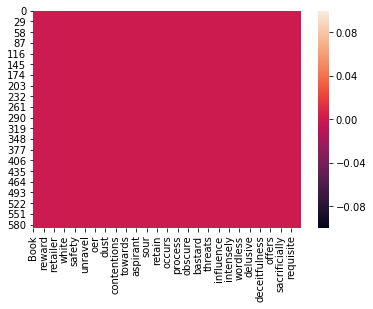

In [7]:
sns.heatmap(df.isna())

In [8]:
def make_classes(book):
    if book.find('Buddhism') != -1:
        return 'Buddhism'
    elif book.find('TaoTeChing') != -1:
        return 'TaoTeChing'
    elif book.find('Upanishad') != -1:
        return 'Upanishad'
    elif book.find('YogaSutra') != -1:
        return 'YogaSutra'
    elif book.find('BookOfProverb') != -1:
        return 'BookOfProverb'
    elif book.find('BookOfEcclesiastes') != -1:
        return 'BookOfEcclesiastes'
    elif book.find('BookOfEccleasiasticus') != -1:
        return 'BookOfEccleasiasticus'
    elif book.find('BookOfWisdom') != -1:
        return 'BookOfWisdom'
    else:
        print('Unknown Catagory')
        return 'Unknown Catagory'

In [9]:
df['Class']=df['Book'].apply(make_classes)

In [10]:
df.head()

,Book,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains,Class
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Buddhism


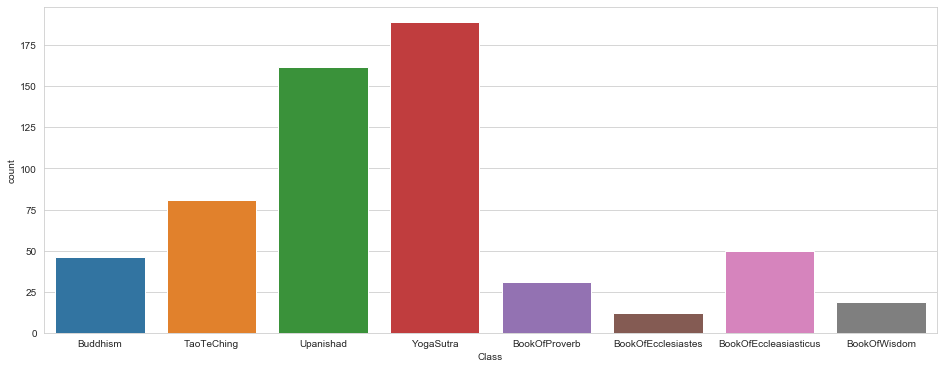

In [11]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
sns.countplot('Class',data=df)

In [12]:
X=df.drop(columns=['Book','Class'])

In [13]:
y=df.Class

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [16]:
from sklearn.svm import SVC

In [17]:
clf=SVC()

In [18]:
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred=clf.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
df.Class.unique()

array(['Buddhism', 'TaoTeChing', 'Upanishad', 'YogaSutra',
       'BookOfProverb', 'BookOfEcclesiastes', 'BookOfEccleasiasticus',
       'BookOfWisdom'], dtype=object)

In [22]:
target_names=['Buddhism', 'TaoTeChing', 'Upanishad', 'YogaSutra','BookOfProverb', 'BookOfEcclesiastes', 'BookOfEccleasiasticus','BookOfWisdom']

In [23]:
confusion_matrix(y_test, y_pred,labels=target_names)

array([[ 1,  0,  2,  1,  0,  0,  7,  0],
       [ 0, 15,  8,  3,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0]], dtype=int64)

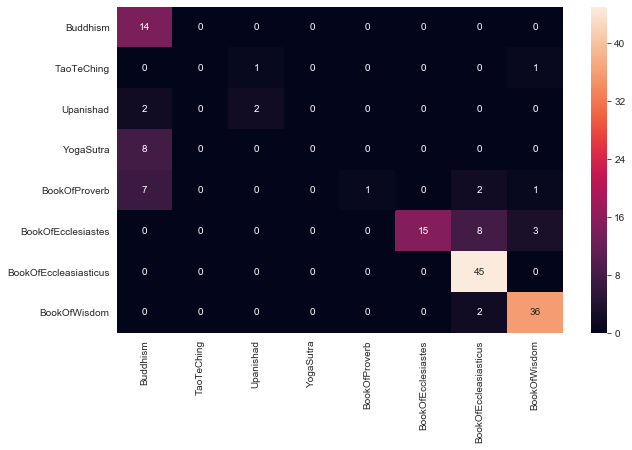

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,xticklabels=target_names,yticklabels=target_names)

In [25]:
accuracy_score(y_test, y_pred)

0.7635135135135135

In [26]:
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

             Buddhism       0.45      1.00      0.62        14
           TaoTeChing       0.00      0.00      0.00         2
            Upanishad       0.67      0.50      0.57         4
            YogaSutra       0.00      0.00      0.00         8
        BookOfProverb       1.00      0.09      0.17        11
   BookOfEcclesiastes       1.00      0.58      0.73        26
BookOfEccleasiasticus       0.79      1.00      0.88        45
         BookOfWisdom       0.88      0.95      0.91        38

             accuracy                           0.76       148
            macro avg       0.60      0.51      0.49       148
         weighted avg       0.78      0.76      0.72       148



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
